## Feature Engineering Part 2

###### In the first part of feature engineering new features added to the model, this part is to examine features in detail the dataset already has. Features will be applied transformation and will be scaled according to their distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
#import statsmodels.api as sm
#import pylab
from scipy.stats import shapiro
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from erroranal import ErrorAnalysis


In [2]:
df = pd.read_csv("data_fe1.csv")
df.drop(["Unnamed: 0","LotFrontage","Utilities"], axis=1, inplace=True)

In [6]:
err0 = ErrorAnalysis(df, target="SalePrice", sample_drop=[1298])    
err0.fit()

(0.08851119997770282, 0.13648962245920168)

In [19]:
df.drop([1298], axis=0 ,inplace=True)

### LotArea

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


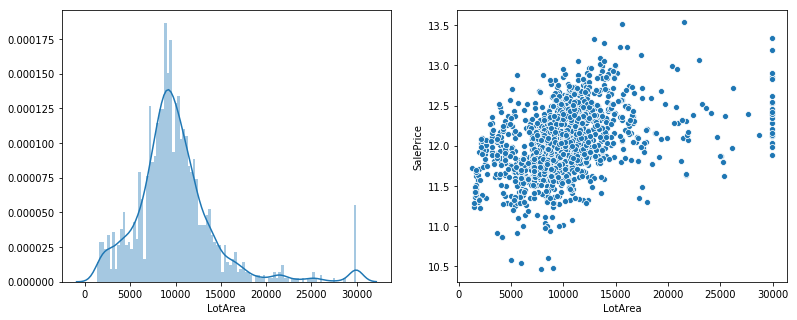

In [16]:
var = df.LotArea.copy()
var[var > k.std()*3] = var.std()*3
fig1, ax1 = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax1[0], bins=100)
sns.scatterplot(x=var, y=df.SalePrice, ax=ax1[1])

In [17]:
scaler = MinMaxScaler() 
scaler.fit(np.array(var).reshape(-1,1)) 
scaler.transform(np.array(var).reshape(-1,1)) 
df.LotArea = scaler.transform(np.array(var).reshape(-1,1))

### BsmtUnfSf

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


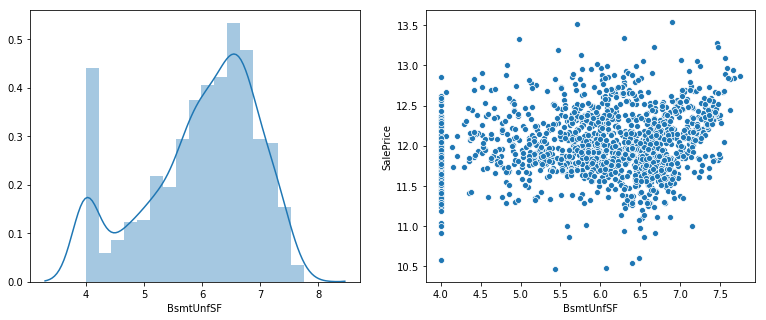

In [19]:
var2 = df.BsmtUnfSF.copy()
var2 = np.log((var2 + 3)**(2/3))
var2 = np.log(var2 + 3)
var2[var2<4] = 4
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [20]:
scaler = MinMaxScaler() 
scaler.fit(np.array(var2).reshape(-1,1)) 
df.BsmtUnfSF = scaler.transform(np.array(var2).reshape(-1,1))

### TotalBsmtSF

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


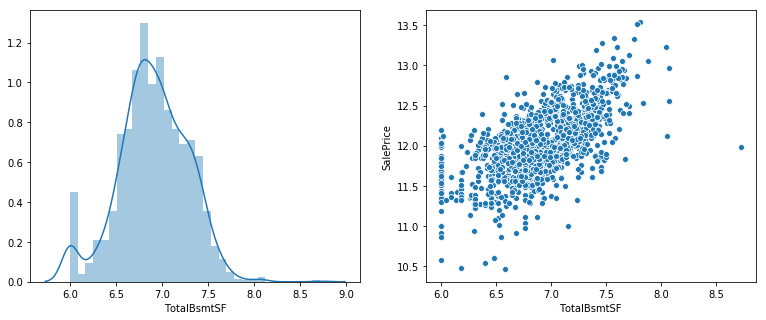

In [24]:
var = df.TotalBsmtSF.copy()
var[var<300]=300
var[var>2200] = 2200
var = np.log(var + 3)
var[var<6] = 6
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [25]:
scaler = MinMaxScaler() 
scaler.fit(np.array(var).reshape(-1,1)) 
scaler.transform(np.array(var).reshape(-1,1)) 
var = scaler.transform(np.array(var).reshape(-1,1))
df.TotalBsmtSF = var

### GrLivArea

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


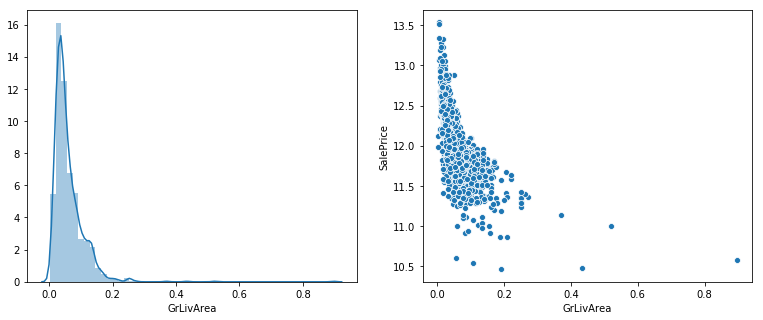

In [31]:
var = df.GrLivArea.copy()
var = k.copy()
var = (var**(-2))*100000 
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [32]:
scaler = MinMaxScaler() 
scaler.fit(np.array(var).reshape(-1,1)) 
var = scaler.transform(np.array(var).reshape(-1,1))
df.GrLivArea = var

### TotalSF

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


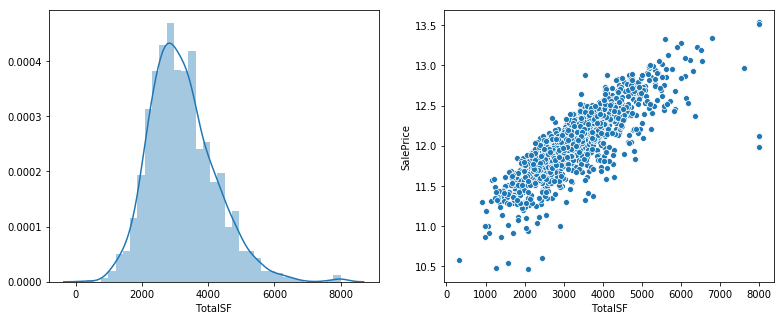

In [38]:
var = df.TotalSF.copy()
var[var>8000]=8000
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [39]:
scaler = StandardScaler() 
scaler.fit(np.array(var).reshape(-1,1)) 
var = scaler.transform(np.array(a).reshape(-1,1))
df.TotalSF = var

### 1stFlrSF

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


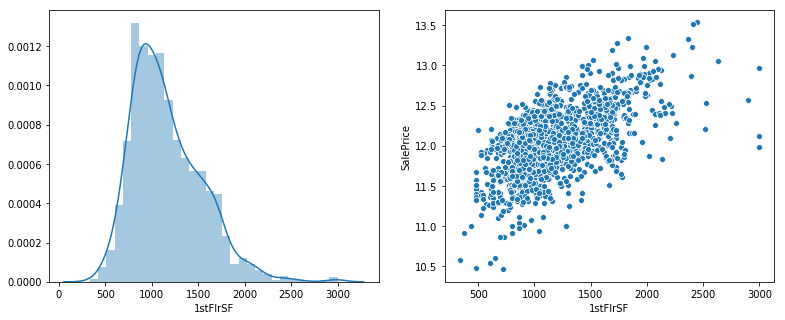

In [45]:
var = df["1stFlrSF"].copy()
var[var>3000] = 3000
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [46]:
scaler = StandardScaler() 
scaler.fit(np.array(var).reshape(-1,1)) 
df["1stFlrSF"] = scaler.transform(np.array(var).reshape(-1,1))

### BathRat

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


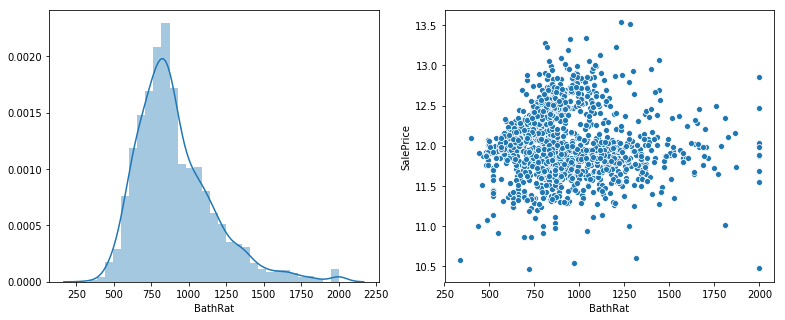

In [52]:
var = df.BathRat.copy()
var[var>2000] = 2000
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [53]:
scaler = StandardScaler() 
scaler.fit(np.array(var).reshape(-1,1)) 
df.BathRat = scaler.transform(np.array(var).reshape(-1,1))

### RoomRat

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


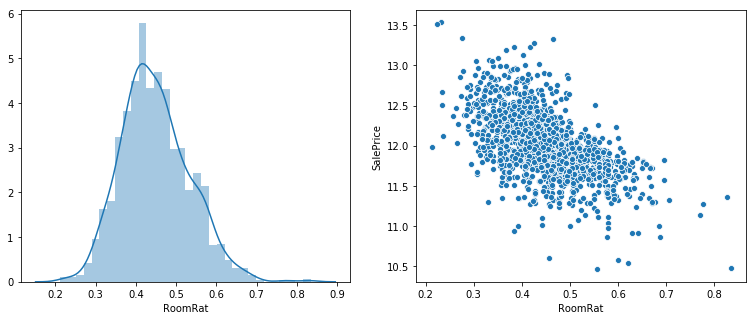

In [59]:
var = df.RoomRat.copy()
var = var**(-1)*100

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [60]:
df.RoomRat = var

### KitcRat

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


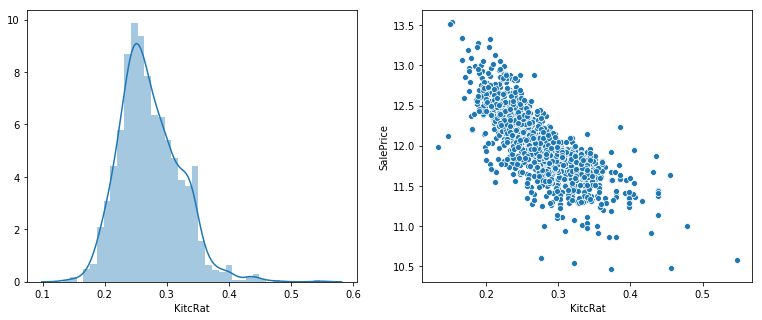

In [65]:
var = df.KitcRat.copy()
var = var**(-1/2)*10

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [66]:
scaler = StandardScaler() 
scaler.fit(np.array(var).reshape(-1,1)) 
df.KitcRat = scaler.transform(np.array(var).reshape(-1,1))

### TotalOutSF   

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


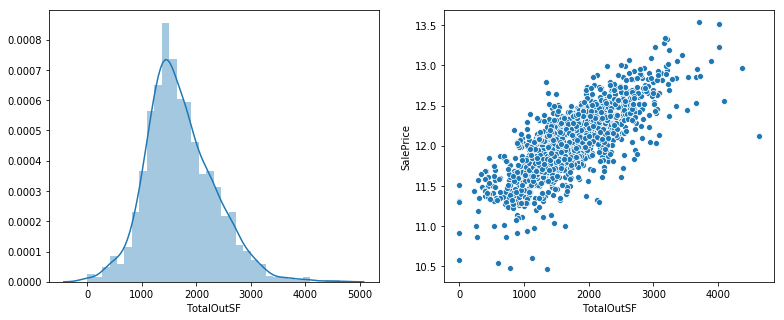

In [74]:
var = df.TotalOutSF.copy()

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [75]:
scaler = MinMaxScaler() 
scaler.fit(np.array(var).reshape(-1,1)) 
df.TotalOutSF = scaler.transform(np.array(var).reshape(-1,1))

### BsmtRat

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


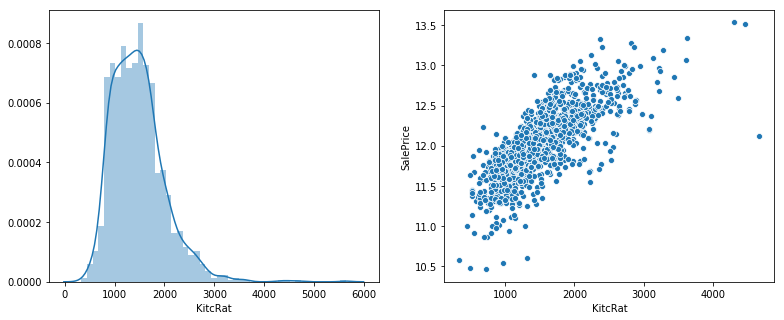

In [81]:
var = df.BsmtRat.copy()
var[ var< 1.2] = 1.2
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [82]:
df.BsmtRat = var

### GarageRat

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


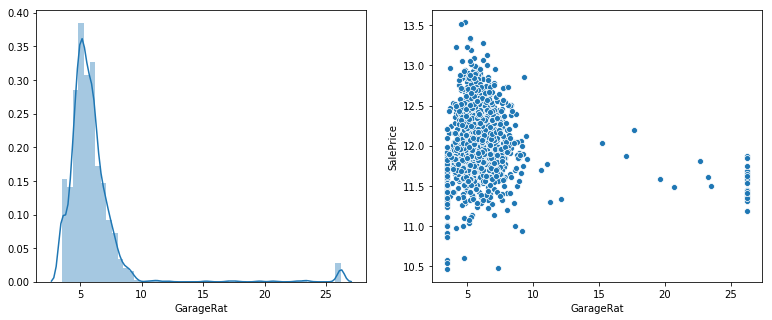

In [88]:
var = df.GarageRat.copy()
var = var**10
var[ var< 3.5] = 3.5

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
sns.distplot(var, ax=ax[0])
sns.scatterplot(x=var, y=df.SalePrice, ax=ax[1])

In [89]:
scaler = StandardScaler() 
scaler.fit(np.array(var).reshape(-1,1)) 
df.GarageRat = scaler.transform(np.array(var).reshape(-1,1))

### Modeling & Results

In [100]:
y = df.SalePrice
X = df.drop(["SalePrice"], axis=1)   
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 101)

In [102]:
lasso = Lasso(max_iter=100000)
prms = { "alpha" : [0.00001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.001,0.1,1]}
lasso_reg = GridSearchCV(lasso, prms, scoring="neg_mean_squared_error", cv=5)
lasso_reg.fit(X_train,y_train)
lasso_pred_train = lasso_reg.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(lasso_pred_train, y_train)))

lasso_pred_test = lasso_reg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(lasso_pred_test, y_test)))
print(lasso_reg.best_params_)

0.0997491546622446
0.12440208355419809
{'alpha': 0.0004}


In [573]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_pred_train = lm.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(lm_pred_train, y_train)))

lm_pred_test = lm.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(lm_pred_test, y_test)))

0.08574251779689603
0.12276365097770706


In [367]:
ridge = Ridge(max_iter = 1000000)
prms = { "alpha" : [0.1,1,5,6,7,7.5,8,8.5,9,10,12,15,20,50]}
ridge_reg = GridSearchCV(ridge, prms, scoring="neg_mean_squared_error", cv=5)
ridge_reg.fit(X_train,y_train)
ridge_pred_train = ridge_reg.predict(X_train)
print(np.sqrt(metrics.mean_squared_error(ridge_pred_train, y_train)))

ridge_pred_test = ridge_reg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(ridge_pred_test, y_test)))
print(ridge_reg.best_params_)

0.09663209994860177
0.12488684673884251
{'alpha': 8}


######  Linear Model promising to give the best result according to last outputs of the models. However, all the model's error outputs give better and more closed results compared to the outputs in Explaritory Data Analysis Model-based notebook. This may a sign of confident of the models. Moreover, test errors decreased from about 0.2 to 0.125